$$
\text{Sigmoid Function:} \qquad \sigma(z) = \frac{1}{1 + e^{-z}}
$$

$$
\text{Entropy Loss (Log-Loss):} \qquad
L(y, \hat{y}) = -\left[ y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) \right]
$$

Where:
- $z = w^T x + b$ (linear combination of weights and features)
- $\hat{y} = \sigma(z)$ (predicted probability)
- $y$ is the true label ($0$ or $1$)

# Import Libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris # Binary classification dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE


In [47]:
# Load the dataset
iris = load_iris()

In [48]:
x = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series((iris.target == 0).astype(int))

In [49]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [50]:
y.head()  # Binary classification: Setosa vs. Non-Setosa

0    1
1    1
2    1
3    1
4    1
dtype: int64

In [51]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


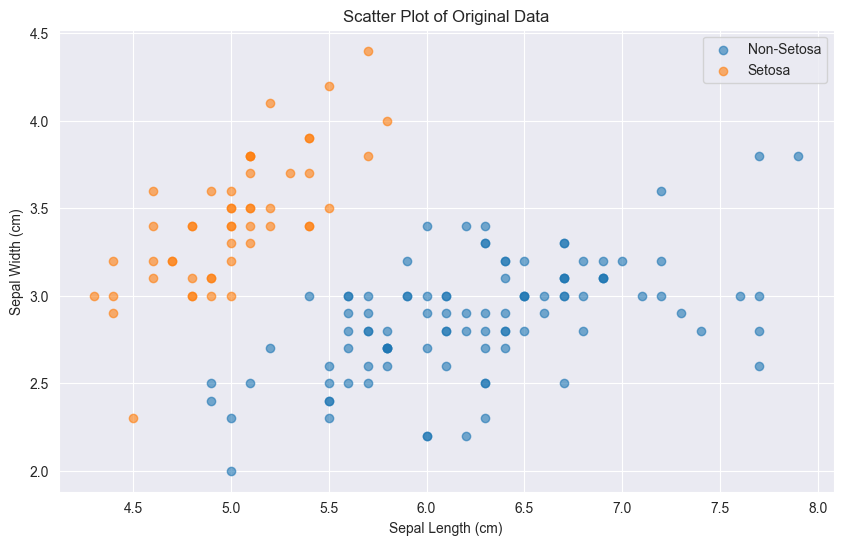

In [52]:
# Scatter plot of the original data
plt.figure(figsize=(10, 6))
plt.scatter(x[y == 0]['sepal length (cm)'], x[y == 0]['sepal width (cm)'], label='Non-Setosa', alpha=0.6)
plt.scatter(x[y == 1]['sepal length (cm)'], x[y == 1]['sepal width (cm)'], label='Setosa', alpha=0.6)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter Plot of Original Data')
plt.legend()
plt.show()

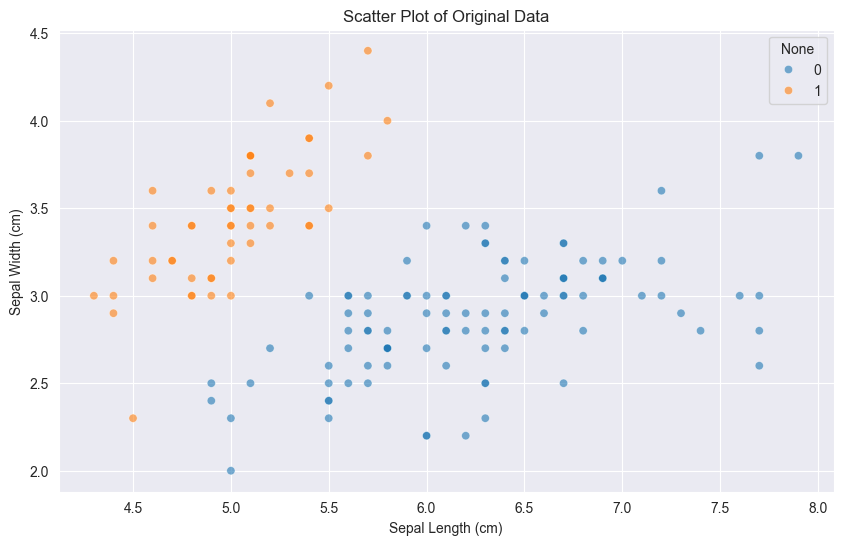

In [53]:
# Scatter plot of the original data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=x, x='sepal length (cm)', y='sepal width (cm)', hue=y, alpha=0.6 )
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter Plot of Original Data')
plt.show()

In [54]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [55]:
# load model
model = LogisticRegression()

In [56]:
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [57]:
y_pred = model.predict(x_test)

In [58]:
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1])

In [59]:
y_pred_proba = model.predict_proba(x_test)[:, 1]

In [60]:
y_pred_proba.round(3)

array([0.005, 0.951, 0.   , 0.006, 0.002, 0.957, 0.061, 0.001, 0.003,
       0.028, 0.001, 0.971, 0.977, 0.965, 0.975, 0.005, 0.   , 0.028,
       0.008, 0.   , 0.961, 0.002, 0.955, 0.   , 0.   , 0.001, 0.   ,
       0.   , 0.965, 0.955, 0.992, 0.978, 0.008, 0.965, 0.981, 0.001,
       0.007, 0.969, 0.979, 0.983, 0.001, 0.009, 0.004, 0.981, 0.971])

In [61]:
# Evaluate the clasiffication model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_pred_proba))

Confusion Matrix:
[[26  0]
 [ 0 19]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        19

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


ROC AUC Score:
1.0


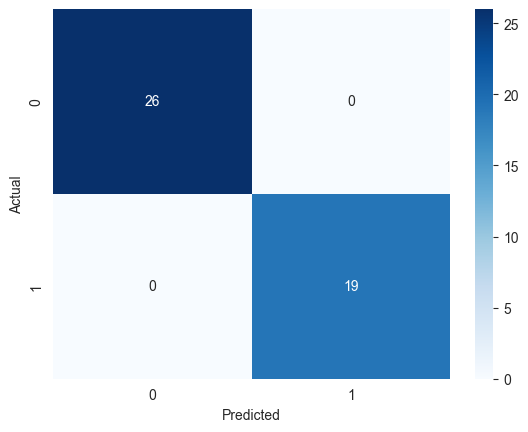

In [62]:
cm =confusion_matrix(y_test, y_pred)
# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Logistic Regression Parameters:

In [63]:
# Regularization Techniques Lasso (L1) and Ridge (L2)
# Train logistic regression with L2 regularization (default)

# j = j + 1/c *  sum (seta)
model_l2 = LogisticRegression(penalty='l2', C=1.0, max_iter=200)
model_l2.fit(x_train, y_train)
#   ax1+ 0.0001 x2 + .......... + nxn

# Train logistic regression with L1 regularization
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=200)
model_l1.fit(x_train, y_train)
#   ax1+ 0x2 + ..........+ nxn

,penalty,'l1'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,200
,multi_class,'deprecated'


In [64]:
# Make predictions L2 regularization (default)
y_pred_L2 = model.predict(x_test)
y_pred_proba_L2 = model.predict_proba(x_test)[:, 1]
# Make predictions L1 regularization
y_pred_L1 = model.predict(x_test)
y_pred_proba_L1 = model.predict_proba(x_test)[:, 1]

In [65]:
# Evaluate the model l2
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_L2))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_L2))
print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_pred_proba_L2))

Confusion Matrix:
[[26  0]
 [ 0 19]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        19

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


ROC AUC Score:
1.0


In [66]:
# Evaluate the model l1
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_L1))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_L1))
print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_pred_proba_L1))

Confusion Matrix:
[[26  0]
 [ 0 19]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        19

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


ROC AUC Score:
1.0


In [67]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

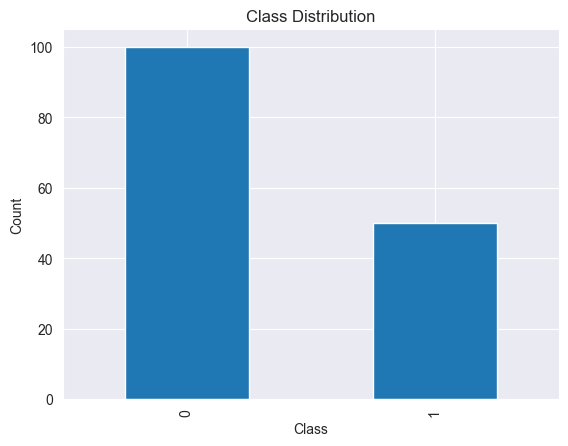

In [68]:
y_series = pd.Series(y)
y_series.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

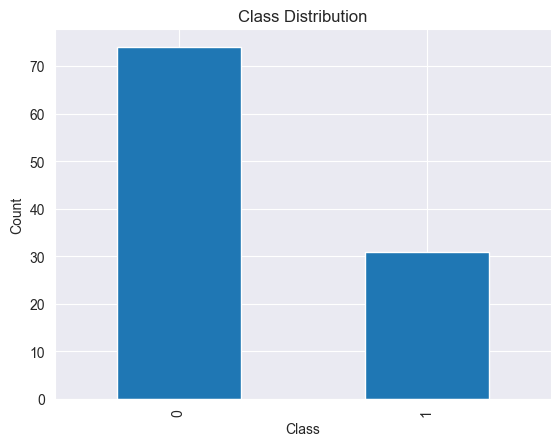

In [69]:
y_series = pd.Series(y_train)
y_series.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [70]:
# Apply SMOTE to the training data (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)
print(X_train_balanced.shape , y_train_balanced.shape)

(148, 4) (148,)


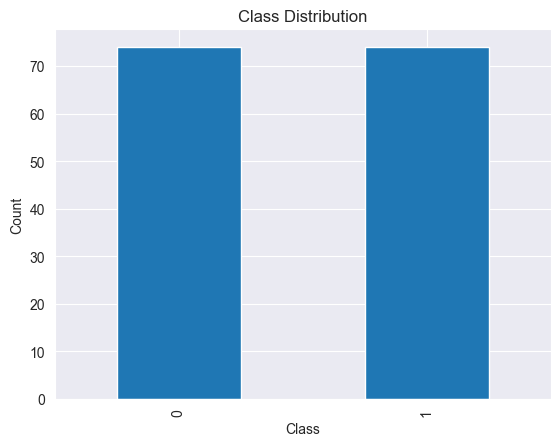

In [71]:
y_series = pd.Series(y_train_balanced)
y_series.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [72]:
# Train logistic regression model with L2 regularization
model_l2 = LogisticRegression(penalty='l2', C=1.0, max_iter=200)
model_l2.fit(X_train_balanced, y_train_balanced)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [73]:
y_pred_train = model_l2.predict(X_train_balanced)
y_pred_proba_train = model_l2.predict_proba(X_train_balanced)[:, 1]

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_train_balanced, y_train_balanced))
print("\nClassification Report:")
print(classification_report(y_train_balanced, y_train_balanced))
print("\nROC AUC Score:")
print(roc_auc_score(y_train_balanced, y_pred_proba_train))

Confusion Matrix:
[[74  0]
 [ 0 74]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00        74

    accuracy                           1.00       148
   macro avg       1.00      1.00      1.00       148
weighted avg       1.00      1.00      1.00       148


ROC AUC Score:
1.0


In [74]:
# Make predictions
y_pred = model_l2.predict(X_test_scaled)
y_pred_proba = model_l2.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_pred_proba))

Confusion Matrix:
[[26  0]
 [ 0 19]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        19

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


ROC AUC Score:
1.0


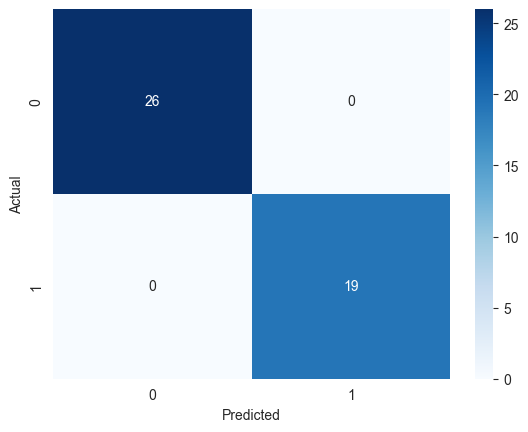

In [75]:
cm =confusion_matrix(y_test, y_pred)
# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()